## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [185]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [187]:
data = get_data(data_path="motorbike_ambulance_calls.csv")

print(data.describe())

print("Мінімальні:")
print(data.min())
print("Максимальні:")
print(data.max())

print("Dataset shape:", data.shape)

            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [189]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Ми вивели базову інфомацію о нашому датасеті, а також його мінімальні та максимальні значення. Більшість стовпців є числовми, тільки два є типу "object".
2. Усього в нас 17379 записів у таблиці, і у своїй більшості вони являются числовими(int64, float64).
3. У нашому датасеті немає None значень, тому можно спокійно використовувати змінні.




**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [190]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = tranform_date(data, 'date')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 2.

C:\Users\admin\AppData\Local\Temp\ipykernel_25032\1909755876.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [191]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [192]:
#your conclusions
#Тепер ми маємо стовпець date із типом datetime64, після чого ми тепер можемо коректно працювати з ним в якості дат та часу.
#Також ми визначили часові межі датасету: Часові межі датасету:
#Перший день: 1 січня 2011 року
#Останній день: 31 грудня 2012 року.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [193]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical

,season
0,spring
1,spring
2,spring
3,spring
4,spring
...,...
17374,spring
17375,spring
17376,spring
17377,spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [194]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].map(lambda s: {'spring': 1, 'summer':2, 'autumn': 3, 'winter':4}[s])
  return df
  
data = encode_season(data, 'season')
data

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

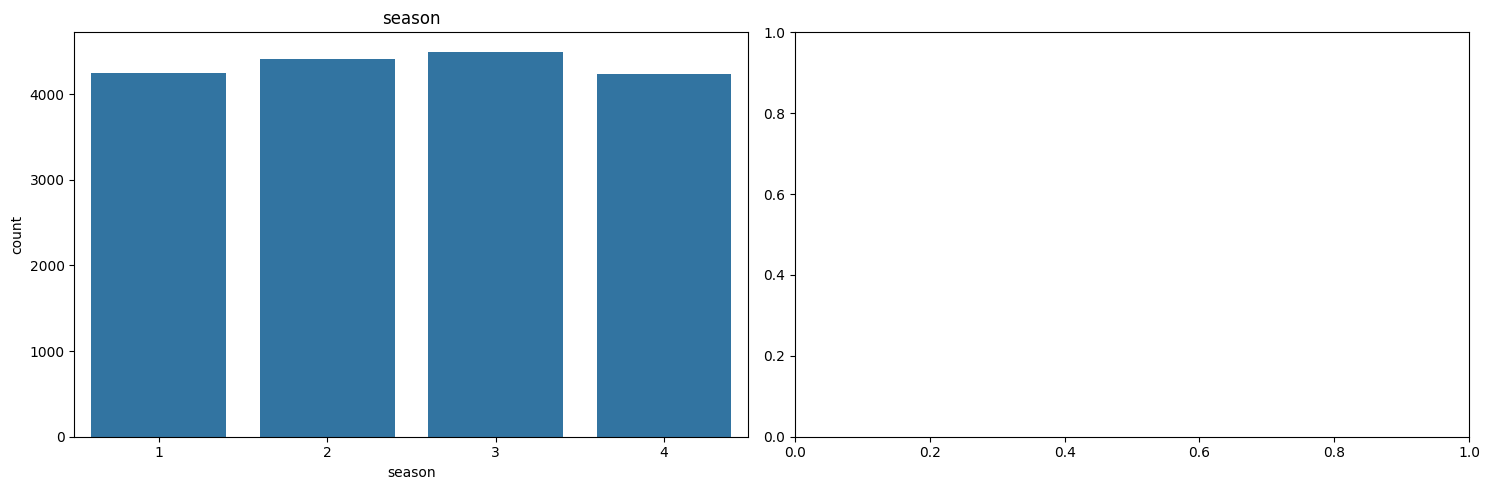

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, subplot in zip(data_categorical.columns, ax.flatten()):
  sns.countplot(data=data, x=col, ax=subplot)
  subplot.set_title(col)
  subplot.set_xlabel(col)
  subplot.set_ylabel("count")
    
  subplot.tick_params(axis='x')
plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



5. Обрали категоріальні змінні у окремий датасет, наприклад типу object. date у наш датасет не ввійшло, тому що ми його конвертували до datetime64.
6. Завдяки функції map, мы переконвертували сезони до більш логічного числового формату, де: 'spring': 1, 'summer':2, 'autumn': 3, 'winter': 4.
7. На графіку відображена змінна season.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [196]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])
data_numerical

,index,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

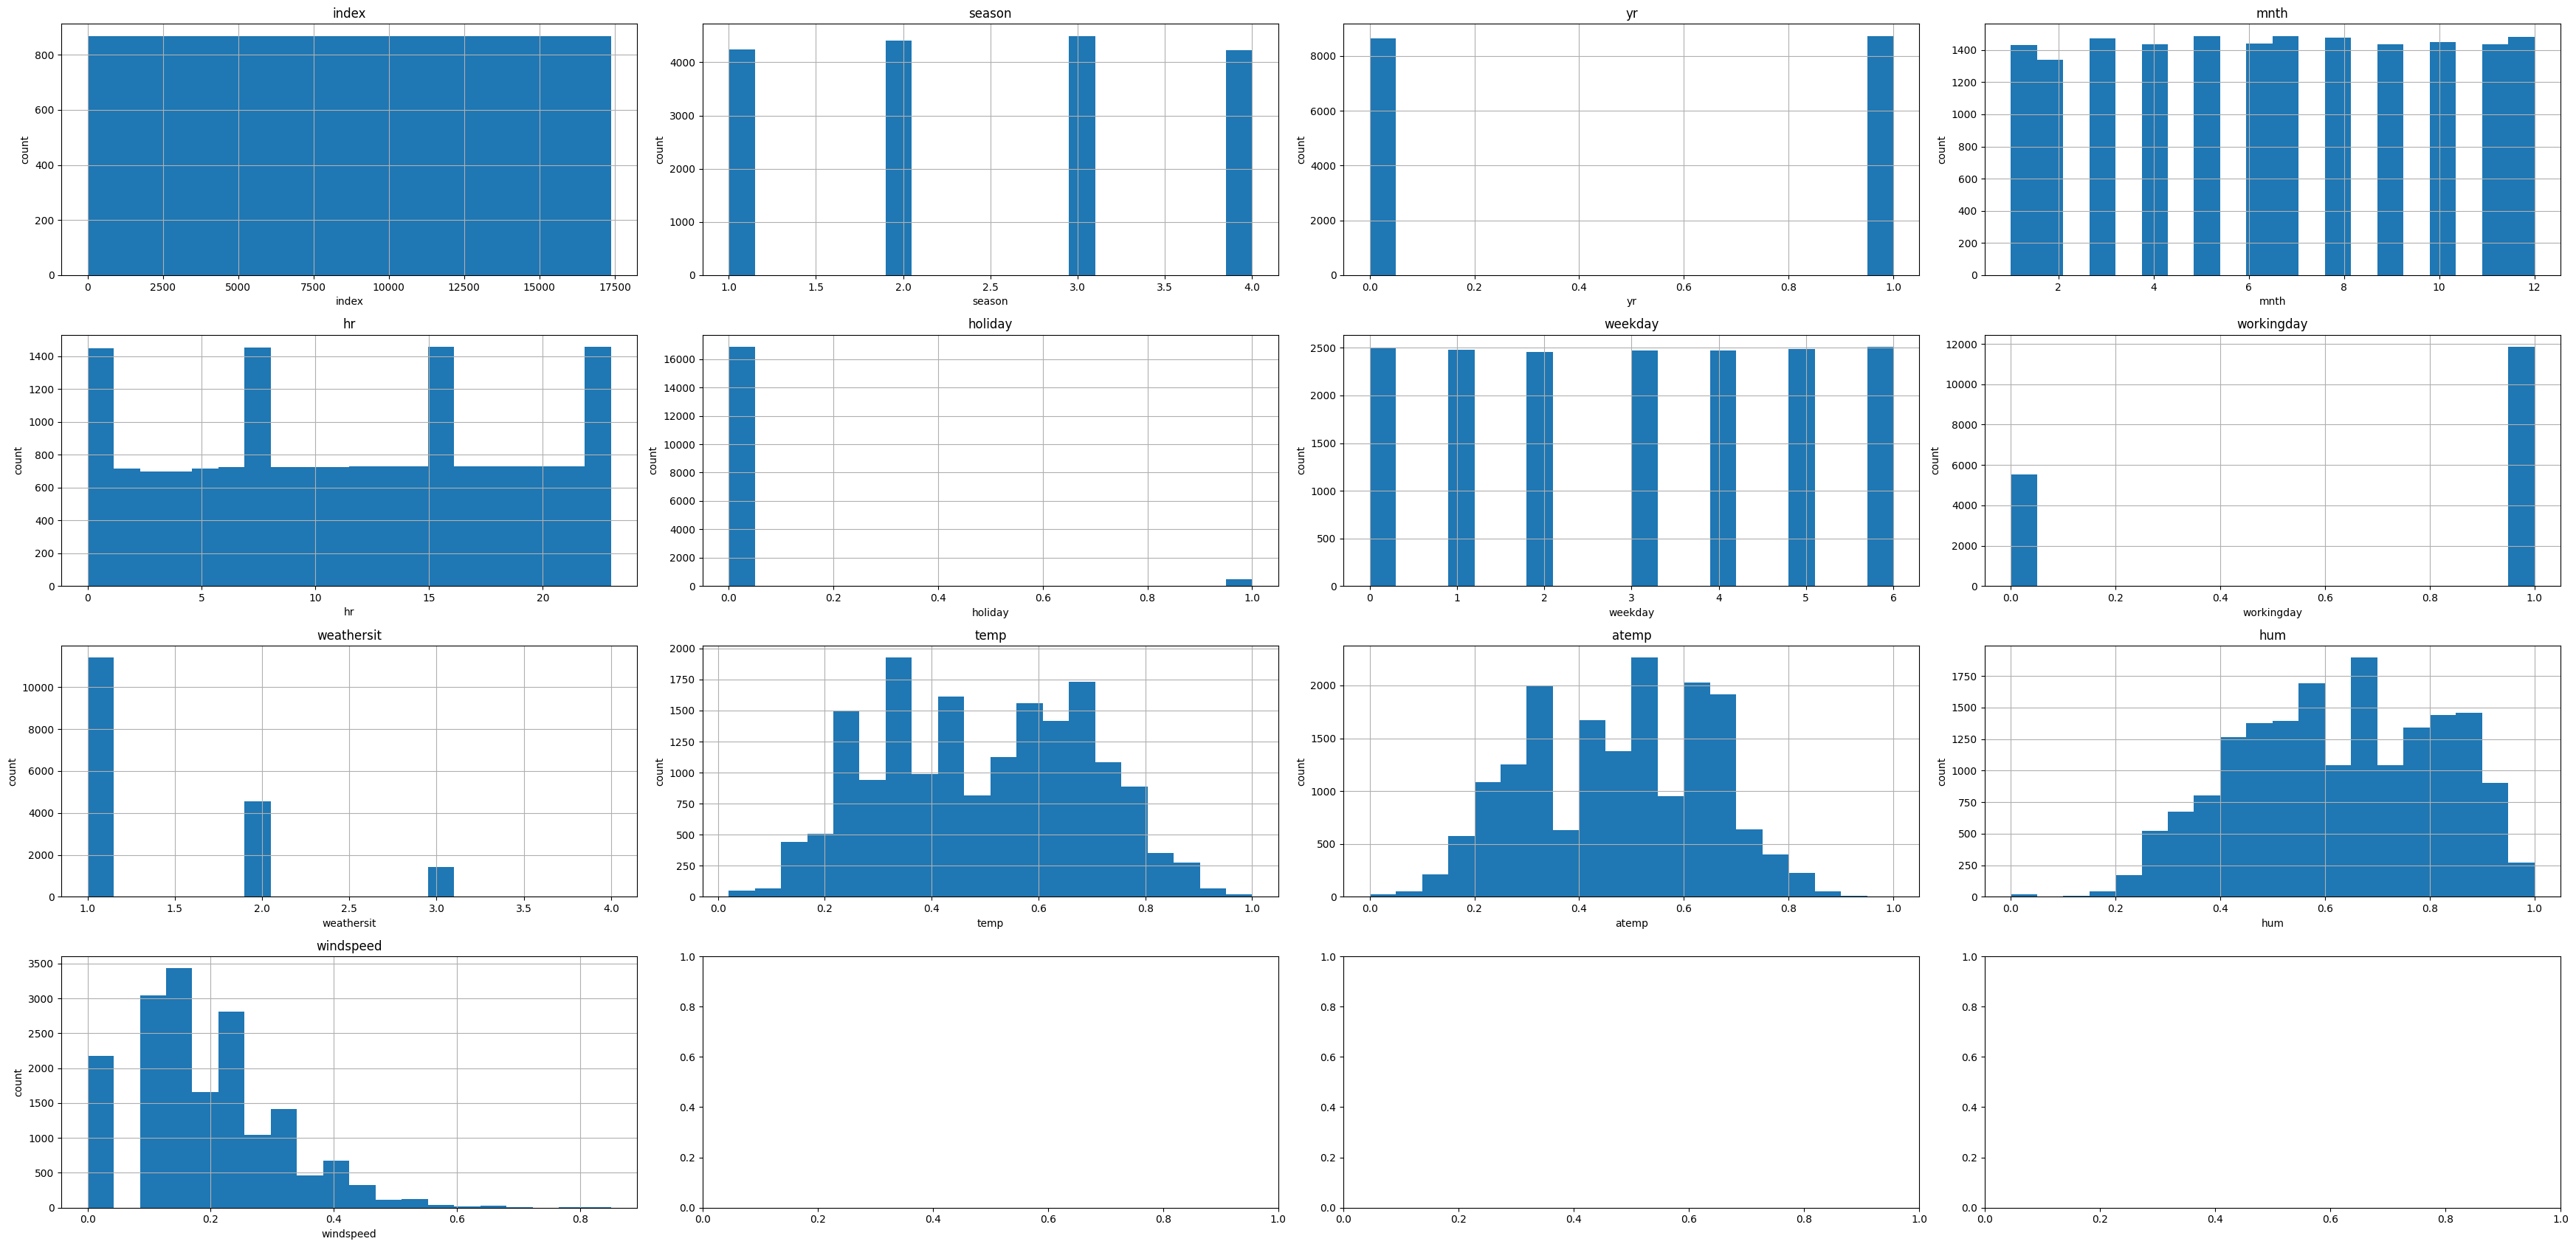

In [197]:
fig, ax = plt.subplots(4, 4, figsize=(35, 17))
for col, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    data_numerical[col].hist(ax=subplot, bins=20)
    subplot.set_title(col)
    subplot.set_xlabel(col)
    subplot.set_ylabel("count")
plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

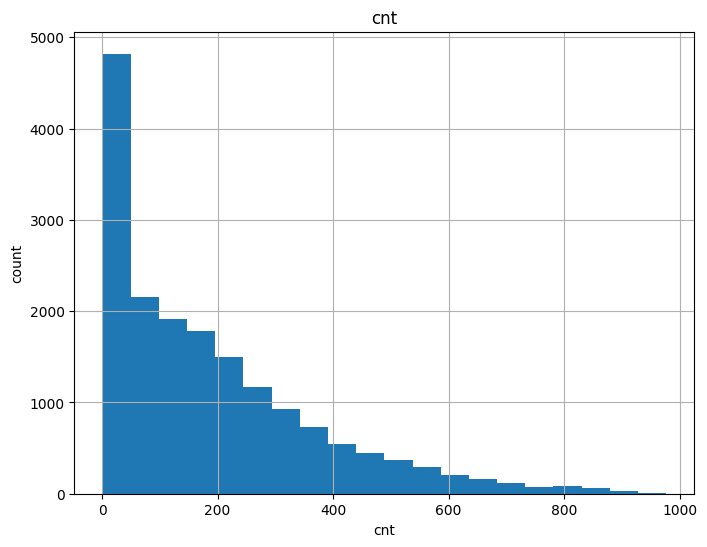

Skewness of 'cnt': 1.2774116037490577


In [198]:
plt.figure(figsize=(8, 6))
data['cnt'].hist(bins=20)
plt.title("cnt")
plt.xlabel("cnt")
plt.ylabel("count")
plt.show()


skew_cnt = data['cnt'].skew()
print("Skewness of 'cnt':", skew_cnt)


**Висновки з 8-10 завдання (детальні)**



8. Ми створили окремий датасет із числових данних, у нього війшли такі змінні як: index, season, yr, mnth, hr, holiday, weekday, workingday, weathersit,temp, atemp, hum, windspeed та cnt.
9. На графіках можно побачити аналіз усіх числових змінних нашого датасету.<br>
    temp - нормальний розподіл, більш значень находятся навколо середнього значення.<br>
    atemp - схожий за temp.<br>
    hum - розподіл теж нормальний, від 0 до 1.<br>
    windspeed - схожий на нормальний, з піком близько до середнього значення.<br>
    hr - можна побачити, що є піки активності в пік годин під час дняв період з 7 до 9 годин ранку та з 16 до 18 годин ввечері.<br>
    holiday - більшість днів не є святковими, що видно з високого значення на вершині стовпця 0, що є несвяткові дні.<br>
    workingday - більшість днів були робочими.<br>
    weathersit - більшість днів мають погодні умови, які відповідають першій категорії (ясно, кілька хмар, частково хмарно як було зрозуміло).<br>

10. Завдяки методу skew(), ми знайшли коефіцієнт нахилу: 1.2774116037490577



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

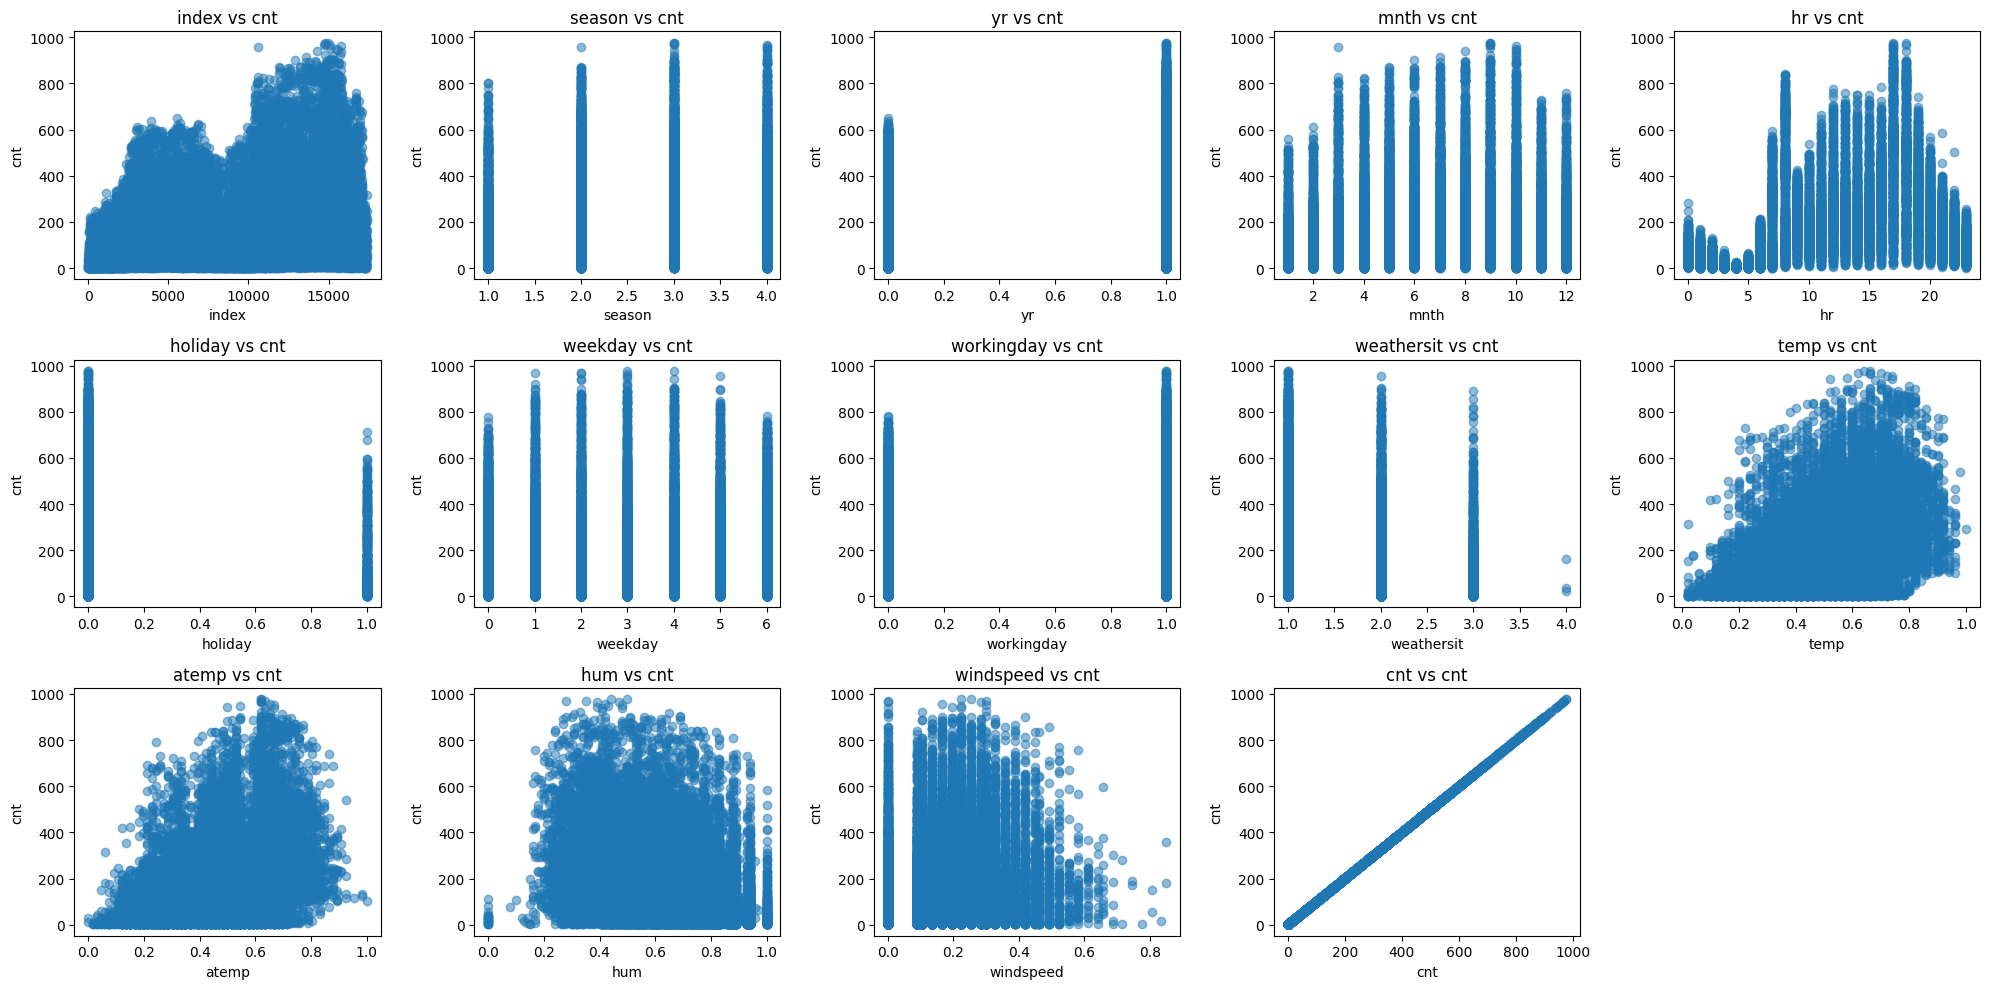

In [199]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(data_numerical, 1):
    plt.subplot(3, 5, i)
    plt.scatter(data[col], data['cnt'], alpha=0.5)
    plt.title(f'{col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('cnt')
plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

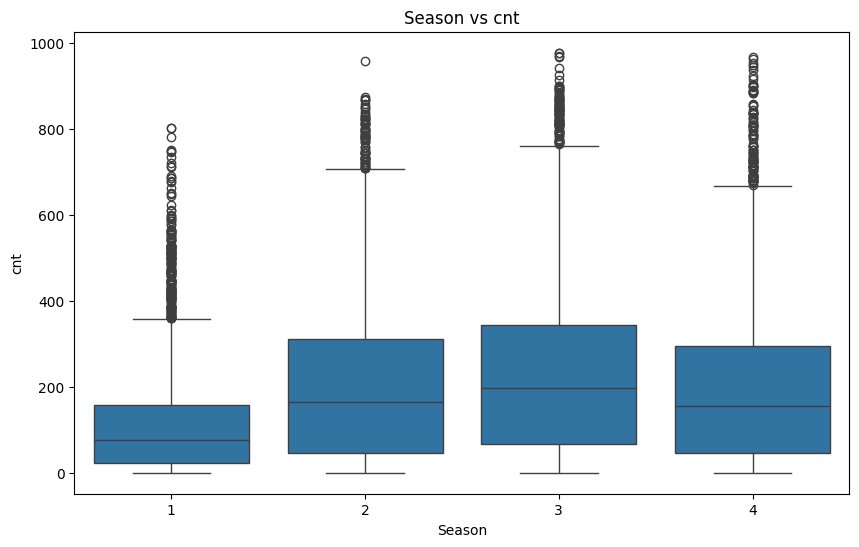

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data, dodge=True)
plt.title('Season vs cnt')
plt.xlabel('Season')
plt.ylabel('cnt')
plt.show()


**Висновки з 11-12 завдання (детальні)**



11.

1) temp vs cnt - Помітна положитивна кореляція між температурою та кількістю викликів, тому чим вища температура, тим більше викликів може бути.

2) atemp vs cnt - Є схожа позитивна кореляція з відчутною температурою.

3) hum vs cnt - Немає точної кореляції між вологістю та кількістю викликів. Розподіл точок досить рівномірний.

4) windspeed vs cnt - Немає чіткої кореляції між швидкістю вітру та кількістю викликів.

Можна сказати, що температура та відчутна температура мають найбільшу впливову силу на кількість викликів, тоді як вологість та швидкість вітру не мають такого великого впливу на цю змінну.



12. Влітку (season=2) та осінню (season=3) є найвища медіана кількості викликів.<br>
У зимовий період (season=4) також може бути висока кількість викликів, але розмах даних ширший, що може означати більшу варіабельність.<br>
Весною (season=1) медіана кількості викликів нижча, але все ще можливі великі значення.


**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

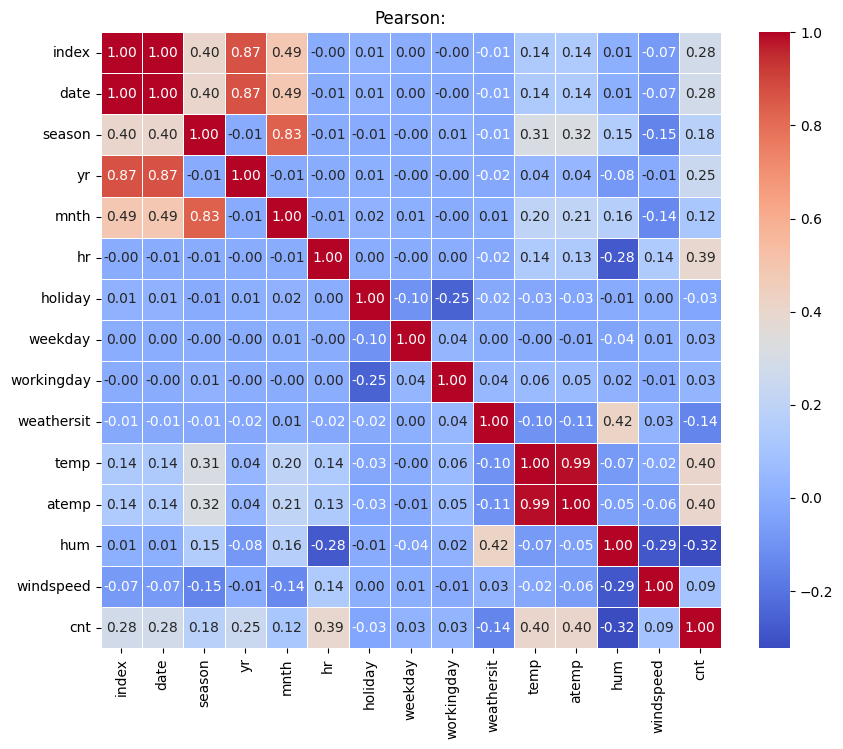

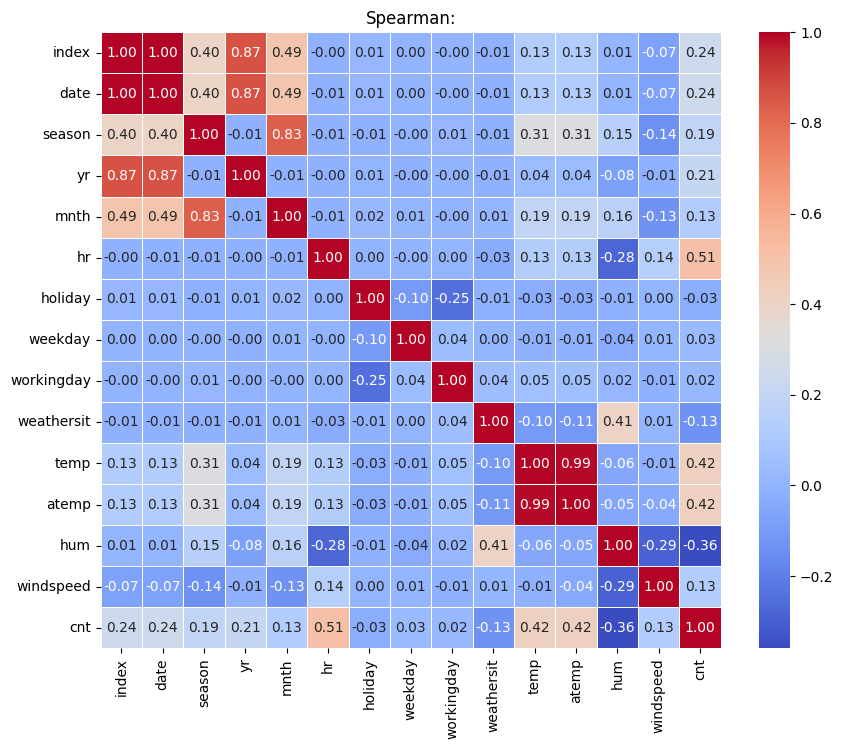

In [201]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson:")
plt.show()

corr_matrix = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Spearman:")
plt.show()


In [202]:
#your conclusions
#З методу Пірсона:
#Змінні "temp" та "atemp" мають високий позитивний кореляційний коефіціент, як і попереднє. Також спостерігається позитивна кореляція між "temp" та "cnt", що може означати, що зі збільшенням температури збільшується кількість викликів "cnt".
#Також можна побачити високий від'ємний кореляційний коефіціент між "weathersit" та "cnt", що вказує на те, що погані погодні умови суттєво зменшують кількість викликів "cnt".
#Метод Спірмена:
#Порівняно з методом Пірсона, метод Спірмена враховує не тільки лінійні, а й монотонні зв'язки між змінними.
#Теплокарта кореляційних коефіціентів за методом Спірмена також показує схожі взаємозв'язки між змінними, але може виявити й не лінійні залежності, які можуть бути присутні в даних.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [203]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')
                          ], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features




In [204]:
features = get_dummies(data)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,...,False,False,False,False,False,True,True,False,False,False
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,True,False,False,False
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,...,True,False,False,False,False,False,True,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [205]:
features['night_hours'] = #your code
features = features.drop('hr', axis = 1)


SyntaxError: invalid syntax (666561049.py, line 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = features.drop('cnt', axis=1)
  y = features['cnt']
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()